In [8]:
import numpy as np
from sklearn import metrics


def balanced_log_loss(y_true, y_pred):
    nc = np.bincount(y_true)
    return metrics.log_loss(y_true, y_pred, sample_weight=1 / nc[y_true], eps=1e-15)


In [2]:
from tabpfn import TabPFNClassifier

In [3]:
import pandas as pd
from pathlib import Path

path = Path('./data')
output = Path('./output')
output.mkdir(exist_ok=True)

In [4]:
df = pd.read_csv(path/'train.csv', index_col='Id')

In [5]:
from sklearn.model_selection import train_test_split

drop_cols = ["EJ"]
dep_vars = ["Class"]

X = df.drop(drop_cols + dep_vars, axis=1)
y = df[dep_vars].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=33)

In [50]:
classifier = TabPFNClassifier(device='cuda', N_ensemble_configurations=64, only_inference=True)

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


In [51]:
classifier.fit(X_train, y_train)
p_eval = classifier.predict_proba(X_test)

In [52]:
balanced_log_loss(y_test, p_eval), metrics.accuracy_score(y_test, p_eval.argmax(axis=1))

(0.34801526742646444, 0.8947368421052632)

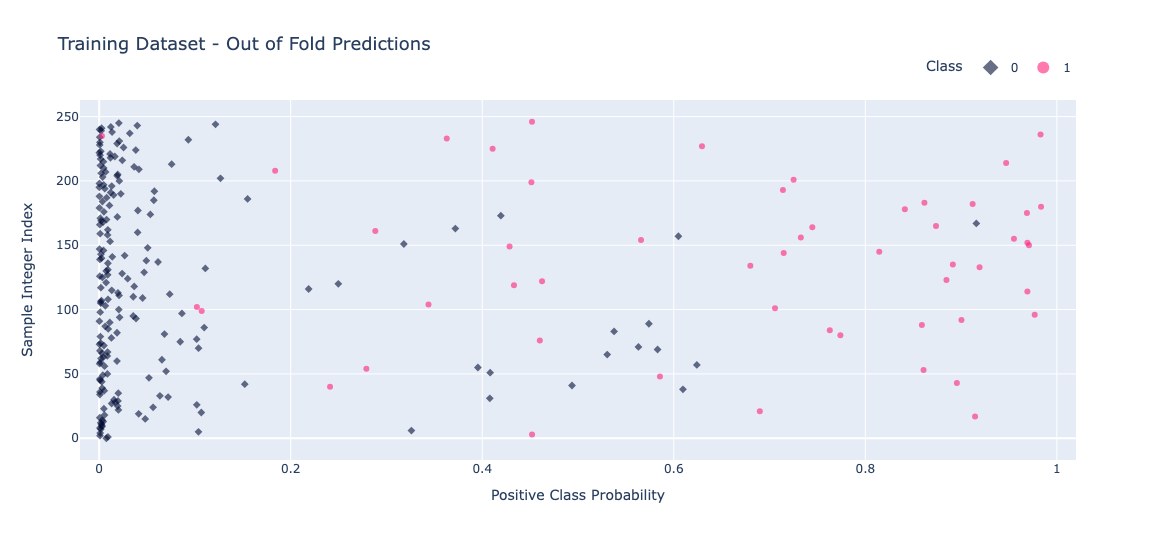

In [53]:
from visualize.results import plot_results
plot_results(y_test, p_eval[:, 1])